In [1]:
import tensorflow as tf 
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import cv2


In [2]:
def data_bal(path):
    data = os.listdir(path)
    df = {i: [] for i in range(len(data))}
    for i in range(len(data)):
        a = f'{path}/{i}/'
        df[i] = [f"{a}{file}" for file in os.listdir(f'{path}/{i}')]
    return df

x = './new_data'
df = data_bal(x)

min_df = min(len(images) for images in df.values())
len_data = len(df)

df = {key: list(set(value))[:min_df] for key, value in df.items()}
total_images = min_df * len(df)
df = pd.DataFrame(df)

# image_paths = df.values.flatten()
# labels = np.repeat(df.columns, len(df))

In [69]:
def preproccess_image(image_path):
    if os.path.exists(image_path):
        image_p = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image_p = cv2.bitwise_not(image_p)
        resized_image = cv2.resize(image_p, (48,48))
        resized_image[np.where(resized_image > 190)] = 255
        resized_image[np.where(resized_image < 125)] = 0
        normalized_image = resized_image / 255.0 
        processed_image = np.expand_dims(normalized_image, axis = -1)
        return normalized_image  # Se devuelve la imagen procesada
    else:
        print(f"Warning: Unable to open or read image file: {image_path}")


5


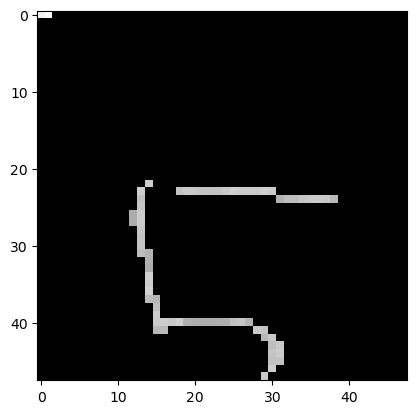

In [70]:
y = np.repeat(df.columns, len(df))
X = []

for var in df:
    for image in df[var]:
        X.append(preproccess_image(image))
X = np.array(X)
n = 10232

print(y[n])
plt.imshow(X[n], cmap='gray')
plt.show()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
batch_size = 32

# Definir arquitectura del modelo
model = Sequential([
    Conv2D(32, (7, 7), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')  # 10 clases en total
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience = 4)

In [106]:
# Entrenar el modelo usando el generador de datos de entrenamiento
history = model.fit(X_train, y_train, epochs=50,
                 validation_data=(X_test, y_test), callbacks=[early_stopping])


# Evaluar el modelo en datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Realizar predicciones en datos de prueba
predictions = model.predict(X_test)

# Obtener la etiqueta predicha para cada muestra
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar un informe de clasificación
print(classification_report(y_test, predicted_labels))

model.save('modelo_2.h5')


Epoch 1/50
504/504 [==============================] - 3s 5ms/step - loss: 1.0398 - accuracy: 0.6511 - val_loss: 0.4461 - val_accuracy: 0.8624
Epoch 2/50
504/504 [==============================] - 3s 5ms/step - loss: 0.4720 - accuracy: 0.8496 - val_loss: 0.3337 - val_accuracy: 0.8906
Epoch 3/50
504/504 [==============================] - 3s 5ms/step - loss: 0.3370 - accuracy: 0.8900 - val_loss: 0.2716 - val_accuracy: 0.9134
Epoch 4/50
504/504 [==============================] - 3s 5ms/step - loss: 0.2751 - accuracy: 0.9088 - val_loss: 0.2312 - val_accuracy: 0.9236
Epoch 5/50
504/504 [==============================] - 3s 5ms/step - loss: 0.2363 - accuracy: 0.9227 - val_loss: 0.2122 - val_accuracy: 0.9328
Epoch 6/50
504/504 [==============================] - 3s 5ms/step - loss: 0.2023 - accuracy: 0.9323 - val_loss: 0.2069 - val_accuracy: 0.9313
Epoch 7/50
504/504 [==============================] - 3s 5ms/step - loss: 0.1787 - accuracy: 0.9423 - val_loss: 0.1742 - val_accuracy: 0.9442
Epoch 

In [120]:
# Evaluar el modelo en datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Realizar predicciones en datos de prueba
predictions = model.predict(X_test)

# Obtener la etiqueta predicha para cada muestra
predicted_labels = np.argmax(predictions, axis=1)


126/126 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9529
Test Accuracy: 0.9528769850730896
126/126 [==============================] - 0s 2ms/step


In [107]:
# from tensorflow.keras.models import load_model

# model = load_model('modelo_2.h5')

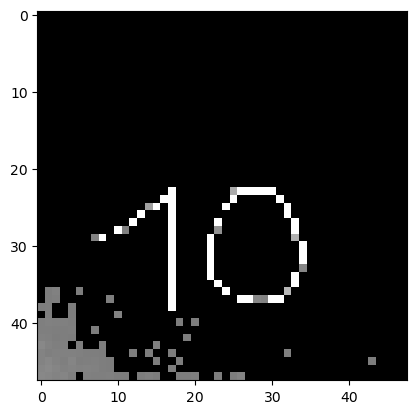

1/1 [==============================] - 0s 40ms/step


8

In [147]:
def preproccess_image(image_path):
    if os.path.exists(image_path):
        image_p = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image_p = cv2.bitwise_not(image_p)
        resized_image = cv2.resize(image_p, (48,48))
        resized_image[np.where(resized_image > 190)] = 255
        resized_image[np.where(resized_image < 125)] = 0
        normalized_image = resized_image / 255.0 
        plt.imshow(normalized_image, cmap='gray')
        plt.show()
        return normalized_image  # Se devuelve la imagen procesada
    else:
        print(f"Warning: Unable to open or read image file: {image_path}")
        
image = preproccess_image('images_2/10.jpg')
image = np.expand_dims(image, axis=-1)  # Agrega una dimensión para el canal de color
image = np.expand_dims(image, axis=0)   # Agrega una dimensión para el lote de imágenes

prediction = model.predict(image)
np.argmax(prediction)

